# Diamond Project

## Imports

In [ ]:
#  %pip install xgboost

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix
#from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer #self imputed the data
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsRegressor
import xgboost
from xgboost import XGBRegressor
print(xgboost.__version__)

0.90


## Importing and Cleaning the Data

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [ ]:
#import data
dimond_train_df = pd.read_csv('/gdrive/MyDrive/Colab Notebooks/Diamond Project/train.csv')
dimond_test_df = pd.read_csv("/gdrive/MyDrive/Colab Notebooks/Diamond Project/test.csv")
dimond_train_df.head(10)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
1,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
2,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
3,6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
4,7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
5,9,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
6,11,0.30,Good,J,SI1,64.0,55.0,339,4.25,4.28,2.73
7,13,0.22,Premium,F,SI1,60.4,61.0,342,3.88,3.84,2.33
8,14,0.31,Ideal,J,SI2,62.2,54.0,344,4.35,4.37,2.71
9,15,0.20,Premium,E,SI2,60.2,62.0,345,3.79,3.75,2.27


#### Rename Columns

In [ ]:
dimond_train_df.rename(columns = {'cut':'quality','carat':'weight'}, inplace = True)
dimond_test_df.rename(columns = {'cut':'quality','carat':'weight'}, inplace = True)

In [ ]:
dimond_test_df.head(10)

,Unnamed: 0,weight,quality,color,clarity,depth,table,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43
1,3,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31
2,8,0.26,Very Good,H,SI1,61.9,55.0,4.07,4.11,2.53
3,10,0.23,Very Good,H,VS1,59.4,61.0,4.00,4.05,2.39
4,12,0.23,Ideal,J,VS1,62.8,56.0,3.93,3.90,2.46
5,22,0.23,Very Good,E,VS2,63.8,55.0,3.85,3.92,2.48
6,23,0.23,Very Good,H,VS1,61.0,57.0,3.94,3.96,2.41
7,26,0.23,Very Good,G,VVS2,60.4,58.0,3.97,4.01,2.41
8,29,0.23,Very Good,D,VS2,60.5,61.0,3.96,3.97,2.40
9,30,0.23,Very Good,F,VS1,60.9,57.0,3.96,3.99,2.42


#### Describe

In [ ]:
dimond_train_df.describe()

,Unnamed: 0,weight,depth,table,price,x,y,z
count,43040.000000,43040.000000,43040.000000,43040.000000,43040.000000,43040.000000,43040.000000,43040.000000
mean,26758.804554,0.796964,61.746080,57.439542,3942.706343,5.724376,5.728122,3.534367
std,15484.904515,0.481455,1.435246,2.240196,4023.534556,1.132496,1.159641,0.714543
min,2.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13326.750000,0.380000,61.000000,56.000000,940.000000,4.660000,4.670000,2.870000
50%,26824.500000,0.710000,61.800000,57.000000,2388.000000,5.710000,5.720000,3.530000
75%,40290.250000,1.030000,62.500000,59.000000,5309.250000,6.500000,6.500000,4.020000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [ ]:
dimond_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43040 entries, 0 to 43039
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  43040 non-null  int64  
 1   weight      43040 non-null  float64
 2   quality     43040 non-null  object 
 3   color       43040 non-null  object 
 4   clarity     43040 non-null  object 
 5   depth       43040 non-null  float64
 6   table       43040 non-null  float64
 7   price       43040 non-null  int64  
 8   x           43040 non-null  float64
 9   y           43040 non-null  float64
 10  z           43040 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 3.6+ MB


### There are no null missing data

In [ ]:
dimond_train_df.isnull().sum()

Unnamed: 0    0
weight        0
quality       0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [ ]:
dimond_train_df.duplicated().sum()

0

In [ ]:
dimond_test_df.duplicated().sum()

0

In [ ]:
dimond_train_df['quality'].value_counts()

Ideal        17424
Premium      11031
Very Good     9407
Good          3910
Fair          1268
Name: quality, dtype: int64

In [ ]:
dimond_train_df['color'].value_counts()

G    9080
E    7723
F    7527
H    6640
D    5555
I    4297
J    2218
Name: color, dtype: int64

In [ ]:
dimond_train_df['clarity'].value_counts()

SI1     10363
VS2      9981
SI2      7380
VS1      6479
VVS2     3959
VVS1     2838
IF       1483
I1        557
Name: clarity, dtype: int64

### There are no missing values or duplicated records, and there is no need for cleaning in the Categorical features.

In [ ]:
dimond_train_df.loc[lambda dimond_train_df: dimond_train_df['x']== 0]

,Unnamed: 0,weight,quality,color,clarity,depth,table,price,x,y,z
9130,11183,1.07,Ideal,F,SI2,61.6,56.0,4954,0.0,6.62,0.0
9722,11964,1.00,Very Good,H,VS2,63.3,53.0,5139,0.0,0.00,0.0
12918,15952,1.14,Fair,G,VS1,57.5,67.0,6381,0.0,0.00,0.0
19640,24521,1.56,Ideal,G,VS2,62.2,54.0,12800,0.0,0.00,0.0
22050,27430,2.25,Premium,H,SI2,62.8,59.0,18034,0.0,0.00,0.0
39924,49557,0.71,Good,F,SI2,64.1,60.0,2130,0.0,0.00,0.0
39925,49558,0.71,Good,F,SI2,64.1,60.0,2130,0.0,0.00,0.0


In [ ]:
dimond_train_df.drop(dimond_train_df.loc[lambda dimond_train_df: dimond_train_df['x']== 0].index,inplace=True)

In [ ]:
dimond_train_df.loc[lambda dimond_train_df: dimond_train_df['y']== 0]

,Unnamed: 0,weight,quality,color,clarity,depth,table,price,x,y,z
9722,11964,1.00,Very Good,H,VS2,63.3,53.0,5139,0.0,0.0,0.0
12918,15952,1.14,Fair,G,VS1,57.5,67.0,6381,0.0,0.0,0.0
19640,24521,1.56,Ideal,G,VS2,62.2,54.0,12800,0.0,0.0,0.0
22050,27430,2.25,Premium,H,SI2,62.8,59.0,18034,0.0,0.0,0.0
39924,49557,0.71,Good,F,SI2,64.1,60.0,2130,0.0,0.0,0.0
39925,49558,0.71,Good,F,SI2,64.1,60.0,2130,0.0,0.0,0.0


In [ ]:
dimond_train_df.drop(dimond_train_df.loc[lambda dimond_train_df: dimond_train_df['y']== 0].index,inplace=True)

In [ ]:
dimond_train_df.loc[lambda dimond_train_df: dimond_train_df['z']== 0]

,Unnamed: 0,weight,quality,color,clarity,depth,table,price,x,y,z
1702,2208,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
1787,2315,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0
4373,5472,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
8300,10168,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0
9130,11183,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0
9722,11964,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.0
12918,15952,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0
19546,24395,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0
19640,24521,1.56,Ideal,G,VS2,62.2,54.0,12800,0.00,0.00,0.0
20925,26124,2.25,Premium,I,SI1,61.3,58.0,15397,8.52,8.42,0.0


In [ ]:
dimond_train_df.drop(dimond_train_df.loc[lambda dimond_train_df: dimond_train_df['z']== 0].index,inplace=True)
dimond_train_df.loc[lambda dimond_train_df: dimond_train_df['z']== 0].index

Int64Index([], dtype='int64')

**Dropped all records with an empty cell in X or Y or Z.**
We can test replacing the values with Median (since the data is quite skewed).
```python
for i in dimond_train_df[dimond_train_df['x']==0].index:
    dimond_train_df.loc[i,'x']=data['x'].median()

for i in dimond_train_df[dimond_train_df['y']==0].index:
    dimond_train_df.loc[i,'y']=data['y'].median()

for i in dimond_train_df[dimond_train_df['z']==0].index:
    dimond_train_df.loc[i,'z']=data['z'].median()
```

### We can drop the records which has the three dimensions equal to zeros.
#While keeping the records where only the z value is missing, we will replace the values since the records which has only z missing are relatively few.

In [ ]:
dimond_train_df.loc[lambda dimond_train_df: dimond_train_df['price']== 0] #NONE
dimond_train_df.loc[lambda dimond_train_df: dimond_train_df['weight']== 0] #NONE
dimond_train_df.loc[lambda dimond_train_df: dimond_train_df['depth']== 0] #NONE
dimond_train_df.loc[lambda dimond_train_df: dimond_train_df['table']== 0] #NONE



,Unnamed: 0,weight,quality,color,clarity,depth,table,price,x,y,z


### There are no out of bound values in the rest of the columns

## Skewness
X, depth, table are balanced out

In [ ]:
dimond_train_df.skew()

C:\Users\HP\AppData\Local\Temp\ipykernel_9704\3179210419.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dimond_train_df.skew()


Unnamed: 0    0.007962
weight        1.171495
depth        -0.081285
table         0.819880
price         1.633806
x             0.434633
y             2.903525
z             1.867575
dtype: float64

## EDA

Text(0.5, 1.0, 'Correlation Matrix')

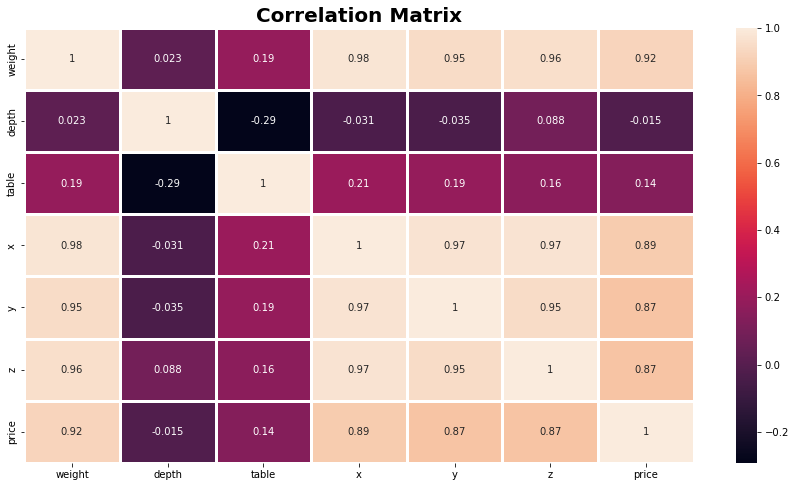

In [ ]:
#Correlation Matrix
fig=plt.figure(figsize=(15,8))
sns.heatmap(dimond_train_df[['weight', 'quality', 'color', 'clarity',
'depth', 'table', 'x','y','z', 'price']].corr(), linewidths=3, annot=True)
plt.title("Correlation Matrix", size=20, weight='bold')

### correlation matrix remarks

The target has negative linear correlation with the feature Depth, so we should create two models and omit Depth in one of them to see if it really affects the prediction negatively or if it has a non-linear correlation to the target.

We also should either omit Carat/weight (since it's highly correlated with x,y,z) or x,y,z.
So we will have to compare another two models one with Carat/weight and the other with x,y,z.

If we keep X,y,Z, we should test removing X, since it has the highest correlation with y,z,carat/weight. So it might be only adding complexity to the model with no additional information.

We can see that there is a relationship between the price variable and the other variables and this satisfies the first assumption of Linear regression.
Strong Negative correlation between depth and table. Weak Negative correlation between Depth and price, x,y.
This implies that, if Depth increases, the price decreases.
Strong Positive correlations between the Carat/weight, x,y,z and price.

This violates the non-multicollinearity assumption of Linear regression.
Multicollinearity hinders the performance and accuracy of our regression model. To avoid this, we have to get rid of some of these variables by doing feature selection.

### Regression Plots

<AxesSubplot:xlabel='weight', ylabel='price'>

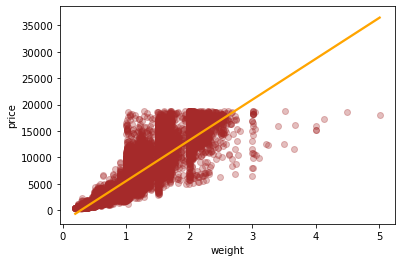

In [ ]:
sns.regplot(x='weight', y='price', data= dimond_train_df,
            scatter_kws={'alpha':0.3, 'color':'brown'}, line_kws={'color':'orange'} )

<AxesSubplot:xlabel='depth', ylabel='price'>

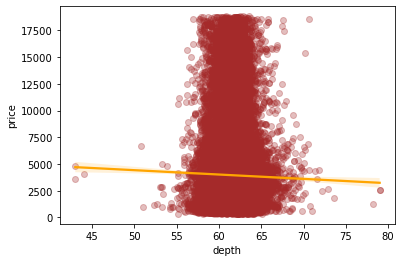

In [ ]:
sns.regplot(x='depth', y='price', data= dimond_train_df,
            scatter_kws={'alpha':0.3, 'color':'brown'}, line_kws={'color':'orange'})

Comparing the two regression plots, we notice how unlike Carat feature which shows strong linear correlation,
Depth feature doest. Depth feature shows a weak negative correlation.

### Hist

array([[<AxesSubplot:title={'center':'weight'}>,
        <AxesSubplot:title={'center':'depth'}>,
        <AxesSubplot:title={'center':'table'}>],
       [<AxesSubplot:title={'center':'x'}>,
        <AxesSubplot:title={'center':'y'}>,
        <AxesSubplot:title={'center':'z'}>],
       [<AxesSubplot:title={'center':'price'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

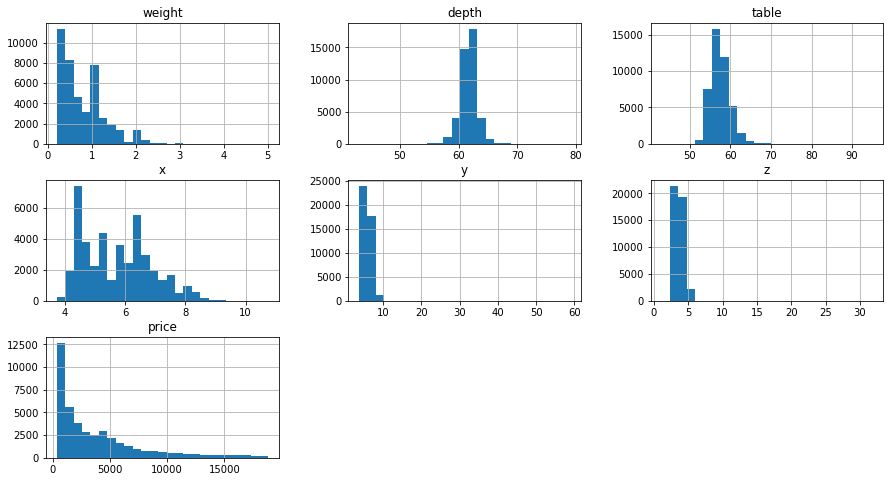

In [ ]:
from turtle import shapesize

dimond_train_df[['weight',
'depth', 'table', 'x','y','z', 'price']].hist(bins = 25, figsize=(15,8)) #'weight', 'quality', 'color',

### pairplot (not much information)

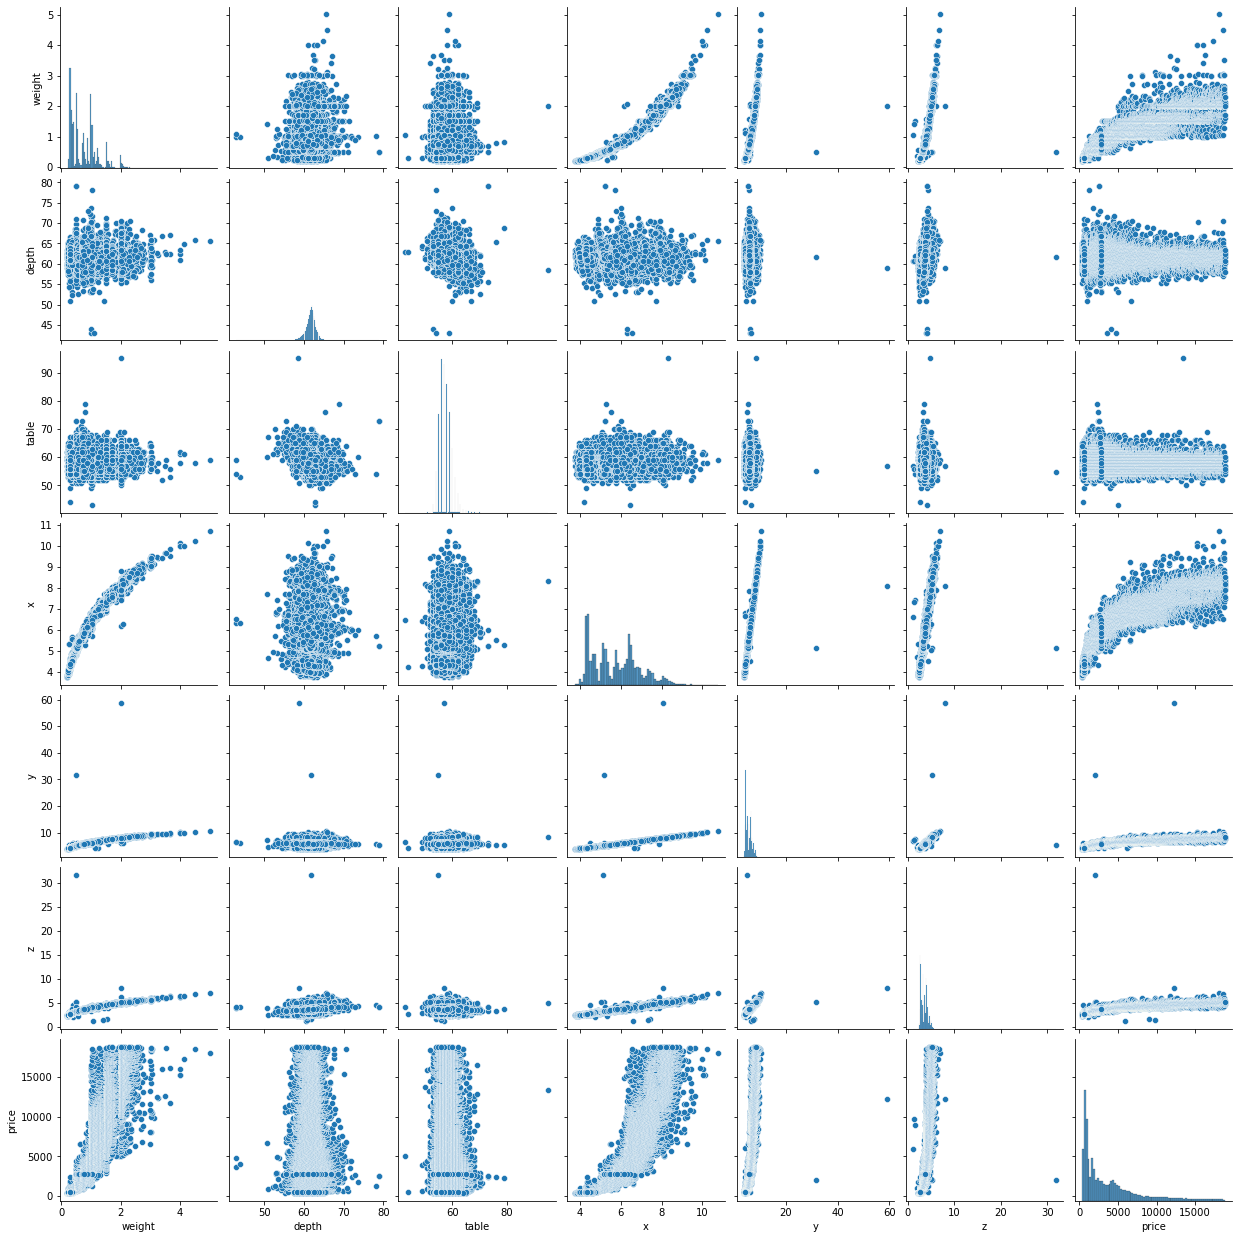

In [ ]:
sns.pairplot(dimond_train_df[['weight',
'depth', 'table', 'x','y','z', 'price']])


## Cleaning

In [ ]:
dimond_train_df.drop(columns='Unnamed: 0', inplace=True)

In [ ]:
numeric_train = dimond_train_df.select_dtypes(include=[np.number]).columns
categorical_train = dimond_train_df.select_dtypes(exclude=[np.number]).columns
print("numeric_train",numeric_train)
print("categorical_train",categorical_train)

numeric_train Index(['weight', 'depth', 'table', 'price', 'x', 'y', 'z'], dtype='object')
categorical_train Index(['quality', 'color', 'clarity'], dtype='object')


### Outliers

In [ ]:
def outlier_detect(columns,data):
    for column in columns: 
        for x in [column]:
            q75,q25 = np.percentile(data.loc[:,x],[75,25])
            intr_qr = q75-q25

            max = q75+(1.5*intr_qr)
            min = q25-(1.5*intr_qr)

            data.loc[data[x] < min,x] = np.nan
            data.loc[data[x] > max,x] = np.nan
    print(data.isnull().sum())
    data.dropna(axis = 0,inplace=True)

outlier_detect(list(numeric_train),dimond_train_df)

weight     1660
quality       0
color         0
clarity       0
depth      1998
table       477
price      2906
x            31
y            30
z            46
dtype: int64


In [ ]:
dimond_train_df.isnull().sum()

weight     0
quality    0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [ ]:
dimond_train_df.shape

(37866, 10)

### Splitting Data

In [ ]:
#X = dimond_train_df[['weight', 'quality', 'color', 'clarity','depth', 'table', 'x','y','z']]
X = dimond_train_df[['weight','quality', 'color', 'clarity','depth', 'table','y','z']]
Y = dimond_train_df['price']

# Create the bins. 'price` variable has
# 37866 observations, so we will add 75 bins.
bins = np.linspace(0, 37866, 75)

# Save your Y values in a new ndarray,
# broken down by the bins created above.
y_binned = np.digitize(Y, bins)

# Pass y_binned to the stratify argument
train_X, test_X , y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=42, stratify=y_binned)

print('Train size: {}, y_train size: {}, Test size: {}, y_test size: {}'.format(
                                                    train_X.shape, y_train.shape, test_X.shape, y_test.shape))

Train size: (38736, 8), y_train size: (38736,), Test size: (4304, 8), y_test size: (4304,)


In [ ]:
numeric_train = train_X.select_dtypes(include=[np.number]).columns
categorical_train = train_X.select_dtypes(exclude=[np.number]).columns
print("numeric_train",numeric_train)
print("categorical_train",categorical_train)

numeric_train Index(['weight', 'depth', 'table', 'y', 'z'], dtype='object')
categorical_train Index(['quality', 'color', 'clarity'], dtype='object')


### Normalizing Categorical Data

### Encoding Data
The primary purpose of normalization is to scale numeric data from different columns down to an equivalent scale so that the model doesn’t get skewed due to huge variance in a few columns. Using min-max normalization

### Column Normalization on numerical features
Testing basic min-max normalization approacch

In [ ]:
class Normalize(BaseEstimator, TransformerMixin):
    def __init__(self,df):
        self.df_copy = df
    def fit(self, df):
        cols = set(dimond_train_df[numeric_train].columns.values) #- {'Unnamed: 0'}
        self.df_copy = df.copy()
        for feature_name in df.columns:
            if (feature_name in cols):
                max_value = df[feature_name].max()
                min_value = df[feature_name].min()
                self.df_copy[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
        return self
    def transform(self, df):
        return self.df_copy

In [ ]:
#normalize(dimond_train_df)

,weight,quality,color,clarity,depth,table,price,x,y,z
0,0.005556,Premium,E,SI1,0.169492,0.782609,326.0,0.035165,0.034858,0.231362
1,0.050000,Premium,I,VS2,0.610169,0.521739,334.0,0.103297,0.119826,0.313625
2,0.061111,Good,J,SI2,0.762712,0.521739,335.0,0.134066,0.145969,0.344473
3,0.022222,Very Good,J,VVS2,0.677966,0.434783,336.0,0.046154,0.061002,0.275064
4,0.022222,Very Good,I,VVS1,0.593220,0.434783,336.0,0.048352,0.065359,0.272494
...,...,...,...,...,...,...,...,...,...,...
43035,0.288889,Premium,D,SI1,0.661017,0.608696,2757.0,0.430769,0.446623,0.557841
43036,0.288889,Ideal,D,SI1,0.338983,0.434783,2757.0,0.443956,0.453159,0.537275
43037,0.288889,Good,D,SI1,0.728814,0.260870,2757.0,0.430769,0.450980,0.565553
43038,0.366667,Premium,H,SI2,0.372881,0.521739,2757.0,0.531868,0.531590,0.598972


## Model Training

### Preprocessing Pipeline

In [ ]:
num_pipeline = Pipeline([
  ('imputer', SimpleImputer(missing_values=0, strategy='median')),
  ('scaler', RobustScaler())
])
preProcessing_pipeline =  ColumnTransformer(
    transformers=[
                ('num', num_pipeline, numeric_train),  
                    #StandardScaler: even though we removed outliers, we will test the robust first
                    #MinMaxScaler
                ('cat', OrdinalEncoder(), categorical_train)
                ])

### XGBoostRegressor

In [ ]:
model_pipeline = Pipeline(steps=[
        ('union', preProcessing_pipeline),
        ('clf', XGBRegressor())
    ])
#xgbr_model = XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)

In [ ]:
grid.estimator.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'union', 'clf', 'union__n_jobs', 'union__remainder', 'union__sparse_threshold', 'union__transformer_weights', 'union__transformers', 'union__verbose', 'union__verbose_feature_names_out', 'union__num', 'union__cat', 'union__num__copy', 'union__num__quantile_range', 'union__num__unit_variance', 'union__num__with_centering', 'union__num__with_scaling', 'union__cat__categories', 'union__cat__dtype', 'union__cat__handle_unknown', 'union__cat__unknown_value', 'clf__base_score', 'clf__booster', 'clf__colsample_bylevel', 'clf__colsample_bynode', 'clf__colsample_bytree', 'clf__gamma', 'clf__importance_type', 'clf__learning_rate', 'clf__max_delta_step', 'clf__max_depth', 'clf__min_child_weight', 'clf__missing', 'clf__n_estimators', 'clf__n_jobs', 'clf__nthread', 'clf__objective', 'clf__random_state', 'clf__reg_alpha', 'clf__reg_lambda', 'clf__scale_pos_weight', 'clf__seed', 'clf__silent', 'clf__subsample', 'clf__verbosity'])

In [ ]:
param_grid = {
    'clf__random_state':[42],
    'clf__max_depth':[7,8],
    'clf__min_child_weight':[5],
    # corresponds to a minimum number of instances needed to be in each node
    ##'clf__subsample':[0.8, 0.6],
    #subsampling ratio of the training instances. It will occur once in every boosting iteration.
    # #Subsample ratio = 0.5 means that the algorithm would randomly sample half of the training data prior to growing trees.
    'clf__colsample_bytree':[1, 0.8],
    #Colsample_bytree = 1 means that we will use all features.
    'clf__reg_alpha': [3],
    'clf__eta': [0.05,0.08]
}

GridSearch

In [ ]:
grid = GridSearchCV(model_pipeline, param_grid, cv=5, scoring = 'neg_root_mean_squared_error')

In [ ]:
print('Train size: {}, y_train size: {}, Test size: {}, y_test size: {}'.format(
                                                    train_X.shape, y_train.shape, test_X.shape, y_test.shape))

Train size: (38736, 8), y_train size: (38736,), Test size: (4304, 8), y_test size: (4304,)


In [ ]:
gb_grid_model = grid.fit(train_X, y_train)#,error_score='raise')#, clf__early_stopping_rounds = 5,)

[08:42:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:42:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:42:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:43:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:43:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:43:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:43:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:43:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

scores

In [ ]:
print('best score: ',gb_grid_model.best_score_)
print('best parameter: ',gb_grid_model.best_params_)
print('error score: ', gb_grid_model.error_score)
print('best_estimator_', gb_grid_model.best_estimator_)


#(remove x,weight)best score:  -356.7985105327917, best parameter:  {'clf__max_depth': 8, 'clf__random_state': 42,
                                                                    # 'clf__reg_alpha': 0.7}
#(removed x,y,z)best score:  -347.9065468529087, best parameter:  {'clf__max_depth': 8, 'clf__random_state': 42,
                                                                  # 'clf__reg_alpha': 1.2, 'clf__subsample': 1}
#(removed x,y,z)best score:  -348.6179067332, best parameter:  {'clf__max_depth': 8, 'clf__random_state': 42,
                                                               # 'clf__reg_alpha': 0.8, 'clf__subsample': 0.6}
#(removed x,y,z)best score:  -348.27132484, best parameter:  {'clf__max_depth': 8, 'clf__min_child_weight': 6,
                                                # 'clf__random_state': 42, 'clf__reg_alpha': 1, 'clf__subsample': 0.8}



best score:  -544.8258515489222
best parameter:  {'clf__colsample_bytree': 1, 'clf__eta': 0.05, 'clf__max_depth': 7, 'clf__min_child_weight': 5, 'clf__random_state': 42, 'clf__reg_alpha': 3}
error score:  nan
best_estimator_ Pipeline(steps=[('union',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(missing_values=0,
                                                                                 strategy='median')),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  Index(['weight', 'depth', 'table', 'y', 'z'], dtype='object')),
                                                 ('cat', OrdinalEncoder(),
                                                  Index(['qua

### KNR

In [ ]:
knr_grid.estimator.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'union', 'clf', 'union__n_jobs', 'union__remainder', 'union__sparse_threshold', 'union__transformer_weights', 'union__transformers', 'union__verbose', 'union__verbose_feature_names_out', 'union__num', 'union__cat', 'union__num__clip', 'union__num__copy', 'union__num__feature_range', 'union__cat__categories', 'union__cat__dtype', 'union__cat__handle_unknown', 'union__cat__unknown_value', 'clf__algorithm', 'clf__leaf_size', 'clf__metric', 'clf__metric_params', 'clf__n_jobs', 'clf__n_neighbors', 'clf__p', 'clf__weights'])

In [ ]:
KNRmodel_pipeline = Pipeline(steps=[
        ('union', preProcessing_pipeline),
        ('clf', KNeighborsRegressor())
    ])
KNR_param_grid = {
    
}
knr_grid = GridSearchCV(KNRmodel_pipeline, KNR_param_grid, cv=10, scoring ='neg_root_mean_squared_error')#, refit='neg_mean_squared_error')
KNR_grid_model = knr_grid.fit(train_X, y_train)
print('best score: ',KNR_grid_model.best_score_)
print('best parameter: ',KNR_grid_model.best_params_)
print('error score: ', KNR_grid_model.error_score)
print('best_estimator_', KNR_grid_model.best_estimator_)

best score:  -588.2844758540086
best parameter:  {}
error score:  nan
best_estimator_ Pipeline(steps=[('union',
                 ColumnTransformer(transformers=[('num', RobustScaler(),
                                                  Index(['weight', 'depth', 'table', 'x', 'y', 'z'], dtype='object')),
                                                 ('cat', OrdinalEncoder(),
                                                  Index(['quality', 'color', 'clarity'], dtype='object'))])),
                ('clf', KNeighborsRegressor())])


### Evaluation Measures

XGBR

In [ ]:
#RMSE
predicted_train = gb_grid_model.predict(train_X)
rmse = mean_squared_error(y_train, predicted_train, squared = False)
print('train rmse',round(rmse,5))

predicted_test = gb_grid_model.predict(test_X)
test_rmse = mean_squared_error(y_test, predicted_test, squared = False)
print('test rmse',round(test_rmse,5))
#(1, w/x)train rmse 246.57884672731385, test rmse 344.1580097235
#(removed x) train rmse 254.214192412, test rmse 344.7832144034
#(removed weight)train rmse 255.198874380, test rmse 349.2871654974
#removed x,weight: train rmse 262.324975371, test rmse 354.29143285
#removed x,y,z: train rmse 272.22213 , test rmse 350.42755
#removed x,y,z: train rmse 268.04107, test rmse 349.24064
#removed x,y,z:train rmse 280.72024, test rmse 344.33133

train rmse 262.72684
test rmse 341.22312


In [ ]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(gb_grid_model, train_X, y_train, cv=3, scoring='neg_root_mean_squared_error'))

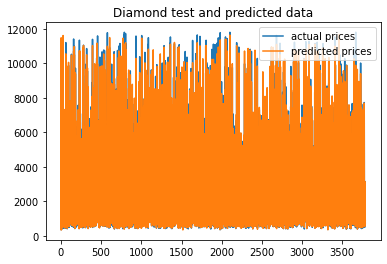

In [ ]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="actual prices")
plt.plot(x_ax, predicted_test, label="predicted prices")
plt.title("Diamond test and predicted data")
plt.legend()
plt.show()

KNR

In [ ]:
knr_predicted_train = KNR_grid_model.predict(train_X)
knr_rmse = mean_squared_error(y_train, knr_predicted_train, squared = False)
print('train rmse',knr_rmse)

knr_predicted_test = KNR_grid_model.predict(test_X)
knr_test_rmse = mean_squared_error(y_test, knr_predicted_test, squared = False)
print('test rmse',knr_test_rmse)

train rmse 460.16718426880675
test rmse 564.7649384908855


Evaluating Comp Test set

XGB_R

In [ ]:
#dimond_test_df.drop(columns='Unnamed: 0')
dimond_test_df = pd.read_csv("D:\\SHAI\\Diamond Project\\test.csv")
dimond_test_df.rename(columns = {'cut':'quality','carat':'weight'}, inplace = True)
print(dimond_test_df.shape)
dimond_test_df_prediction = dimond_test_df.copy()
dimond_test_df_prediction['price'] = gb_grid_model.predict(dimond_test_df[['weight', 'quality', 'color', 'clarity', 'depth', 'table',
       'x', 'y', 'z']])
dimond_test_df_prediction.shape

(10900, 10)


(10900, 11)

KNR

In [ ]:
dimond_test_df = pd.read_csv("D:\\SHAI\\Diamond Project\\test.csv")
dimond_test_df.rename(columns = {'cut':'quality','carat':'weight'}, inplace = True)
print(dimond_test_df.shape)
dimond_test_df_prediction = dimond_test_df.copy()
dimond_test_df_prediction['price'] = KNR_grid_model.predict(dimond_test_df[['weight', 'quality', 'color', 'clarity', 'depth', 'table',
       'x', 'y', 'z']])
dimond_test_df_prediction.shape

(10900, 10)


(10900, 11)

In [ ]:
#predicted = pd.DataFrame()
#predicted['price']= predicted_test
#predicted['index'] = predicted.index
#predicted

,price,index
0,313.241577,0
1,485.208527,1
2,317.585815,2
3,359.140045,3
4,349.294067,4
...,...,...
10895,2792.292969,10895
10896,2947.157959,10896
10897,2885.259277,10897
10898,2792.925293,10898


## Submission

In [ ]:
submission = pd.DataFrame()
submission['Unnamed: 0'] = dimond_test_df_prediction['Unnamed: 0']
submission['price'] = dimond_test_df_prediction['price']
submission.to_csv('submission.csv', index=None)